In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [133]:
def generate_data(w=[3], b=5, data_shape=(1000,1)):
    assert len(w)==data_shape[1], "the w lenghth should equal to the data's second dimension"
    x = np.random.random(data_shape)
    y = np.dot(x, w) + b + np.random.random(data_shape[0])
    # x = np.stack((x, np.ones(1000)),axis=1)
    return x,y

In [134]:
x,y = generate_data()

In [144]:
from sklearn.linear_model import LinearRegression
sk_model = LinearRegression()
sk_model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [145]:
sk_model.coef_

array([2.96661503])

In [146]:
np.mean(np.square(sk_model.predict(x)- y))

0.08023258619314214

# Linear Regression 手刻
- 使用gradient descent更新參數
- 在這裡我們假設用 MSE= $\frac{(x-y)^2}{2N}$ 作為 loss 計算方式
- 訓練時用1筆1筆資料來訓練

In [138]:
class linear_model:
    def __init__(self, learning_rate=0.01):
        self.coef_ = []
        self.bias = 1
        self.lr = learning_rate
        
    def fit(self, X, y, epochs=100):
        self.coef_ = np.ones(X.shape[1])
        assert len(X.shape)==2, "the shape of X need to be 2d"
        assert len(y.shape)==1, "the shape of y need to be 1d"
        assert len(X)==len(y), "len of X need to equal len of y"
        for i in range(epochs):
            for j in range(len(X)):
                self.learn(X[j], y[j])
        
    def learn(self, x, label):
        residual = np.dot(self.coef_, x.T) + self.bias - label
        gradient =  self.coef_ * residual * x
        self.coef_ = self.coef_ - self.lr * gradient
        self.bias = self.bias - self.lr * residual
        
    def predict(self, x):
        return np.dot(self.coef_, x.T) + self.bias
    
    def score(self, x, y):
        return np.mean(np.square(self.predict(x) - y))

In [148]:
model = linear_model()
model.fit(x,y)

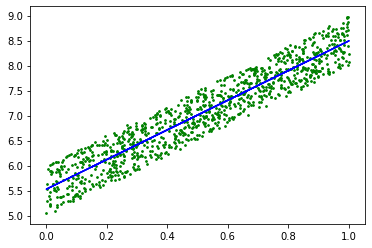

In [149]:
from matplotlib import pyplot as plt
plt.plot(x[:, 0], model.predict(x[:]), color='b')
plt.scatter(x[:], y[:], c='g', s=3)

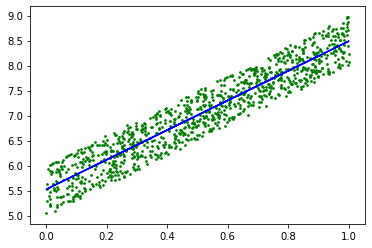

In [150]:
plt.plot(x[:, 0], sk_model.predict(x[:]), color='b')
plt.scatter(x[:], y[:], c='g', s=3)

In [151]:
model.coef_

array([2.96915096])

In [152]:
model.score(x,y)

0.0802429859671425

In [153]:
import random
class linear_model:
    def __init__(self, learning_rate=0.01):
        self.coef_ = []
        self.bias = 1
        self.lr = learning_rate
        
    def shuffle_data(self, x, y):
        c = list(zip(x, y))
        random.shuffle(c)
        a, b = zip(*c)
        a = np.array(a)
        b = np.array(b)
        return a, b
        
    def fit(self, X, y, epochs=100, batch_size=8, seed=42):
#         self.coef_ = np.random.random(X.shape[1])
        np.seed = seed
        random.seed(seed)
        self.coef_ = np.ones(X.shape[1])
        assert len(X.shape)==2, "the shape of X need to be 2d"
        assert len(y.shape)==1, "the shape of y need to be 1d"
        assert len(X)==len(y), "len of X need to equal len of y"
        for i in range(epochs):
            for j in range(len(X)//batch_size - 1):
                start = batch_size*j
                end = batch_size*(j+1)
                self.learn_with_batch_size(X[start:end], y[start:end])
            i = len(X)//batch_size - 1
            start = i * batch_size
            self.learn_with_batch_size(X[start:], y[start:])
            X, y = self.shuffle_data(X, y)
                
    def learn_with_batch_size(self, x, label):
        error = np.mean(np.square(np.dot(self.coef_, x.T) + self.bias - label))
        residual = np.dot(self.coef_, x.T) + self.bias - label
        gradient =  np.mean(np.multiply(self.coef_, x).T * residual, axis=1)
        self.coef_ = self.coef_ - gradient * self.lr
        self.bias = self.bias - self.lr * np.mean(residual)
        
    def predict(self, x):
        return np.dot(self.coef_, x.T) + self.bias

    def score(self, x, y):
        return np.mean(np.square(self.predict(x) - y))

In [154]:
np.mean(np.array([[1,2]]*5).T * [1,1,1,1,1], axis=1)

array([1., 2.])

In [155]:
np.multiply(np.array([1,2]), np.array([[1,2]]*5))

array([[1, 4],
       [1, 4],
       [1, 4],
       [1, 4],
       [1, 4]])

In [156]:
model = linear_model(0.1)
model.fit(x,y,100)

In [157]:
model.score(x,y)

0.08075425350539985